In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
import os
import pandas as pd
data_dir = r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation"
filepaths = []
labels = []
for label in os.listdir(data_dir):
    class_folder = os.path.join(data_dir, label)
    if os.path.isdir(class_folder):
        for filename in os.listdir(class_folder):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                filepaths.append(os.path.join(class_folder, filename))
                labels.append(label)
df = pd.DataFrame({
    'filepath': filepaths,
    'label': labels })
df['class_id'] = df['label'].map({'fire': 0, 'nofire': 1})
print(df.info())
print(df.head())
print(df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  1832 non-null   object
 1   label     1832 non-null   object
 2   class_id  1832 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 43.1+ KB
None
                                            filepath label  class_id
0  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
1  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
2  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
3  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
4  C:\Users\Anushka\Desktop\Forest Fire Detection...  fire         0
                                               filepath   label  class_id
1827  C:\Users\Anushka\Desktop\Forest Fire Detection...  nofire         1
1828  C:\Users\Anushka\Desktop\Forest Fire Detection...  nofire         1
1829  C:\Use

In [8]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras 
import os 
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt

In [18]:
train = ImageDataGenerator(rescale=1/25)
test = ImageDataGenerator(rescale=1/25)
train_dataset = train.flow_from_directory(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [22]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [24]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu' ,input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
r= model.fit(train_dataset, epochs=7, validation_data= test_dataset)

c:\Users\Anushka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 707ms/step - accuracy: 0.8717 - loss: 0.4740 - val_accuracy: 0.8971 - val_loss: 0.3143
Epoch 2/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 476ms/step - accuracy: 0.9487 - loss: 0.1542 - val_accuracy: 0.9265 - val_loss: 0.2162
Epoch 3/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 558ms/step - accuracy: 0.9503 - loss: 0.1322 - val_accuracy: 0.8235 - val_loss: 0.3809
Epoch 4/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 528ms/step - accuracy: 0.9612 - loss: 0.1119 - val_accuracy: 0.9559 - val_loss: 0.1775
Epoch 5/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 524ms/step - accuracy: 0.9722 - loss: 0.1010 - val_accuracy: 0.9118 - val_loss: 0.2947
Epoch 6/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 529ms/step - accuracy: 0.9662 - loss: 0.1019 - val_accuracy: 0.9118 - val_loss: 0.1903
Epoch 7/7
58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 510ms/step - accuracy: 0.9760 - loss: 0.0730 - val_accuracy: 0.9559 - val_loss: 0.1436


In [27]:
predictions=model.predict(test_dataset)
predictions= np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [28]:
predictions

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [29]:
print(len(predictions))

68


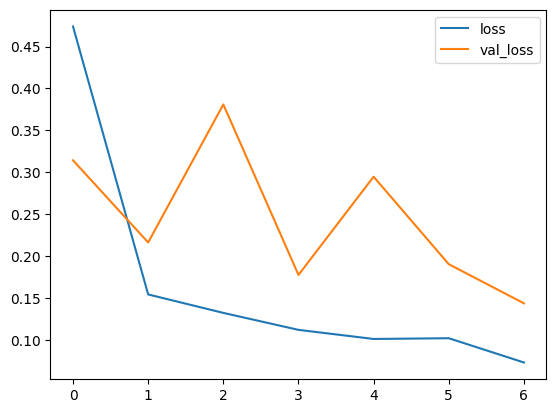

In [31]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

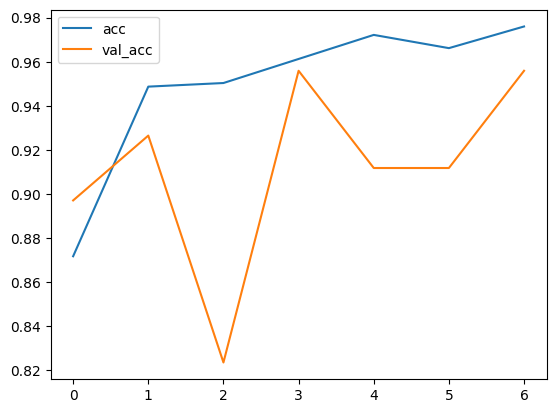

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [36]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    val= model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("No Fire",fontsize=30)
    elif val==0:
        plt.xlabel("Fire",fontsize=30)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.]]


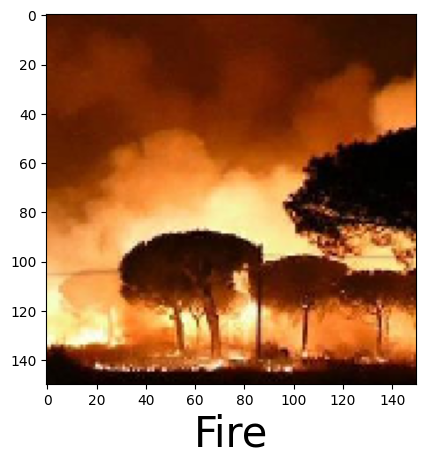

In [54]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation\fire\abc005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.]]


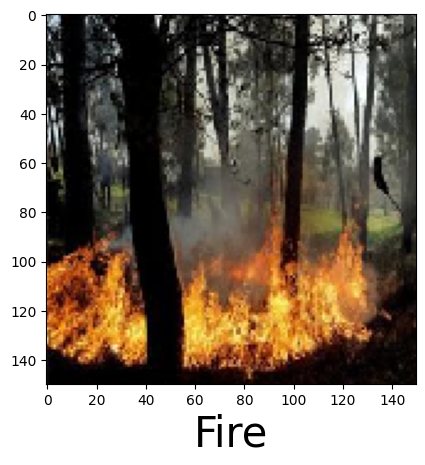

In [57]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation\fire\abc022.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.]]


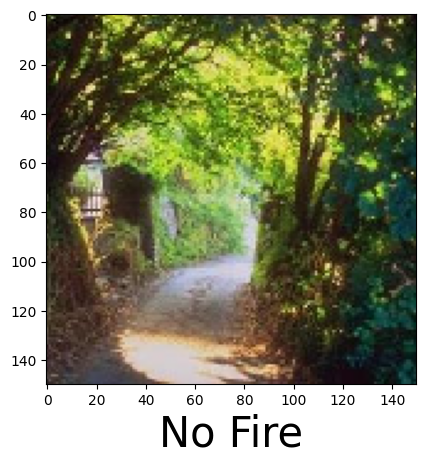

In [58]:
predictImage(r'C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Training and Validation\nofire\abc193.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.]]


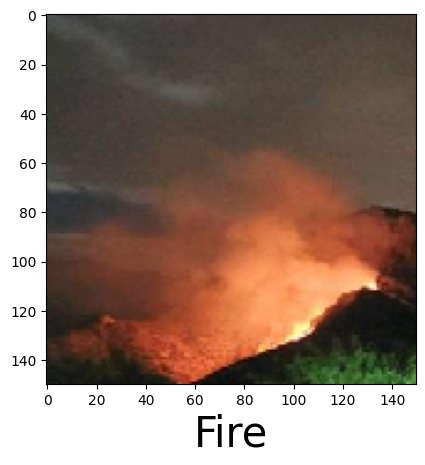

In [41]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\fire\abc170.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.]]


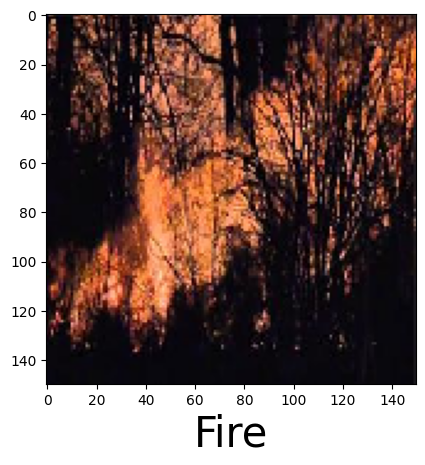

In [69]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\fire\abc189.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.]]


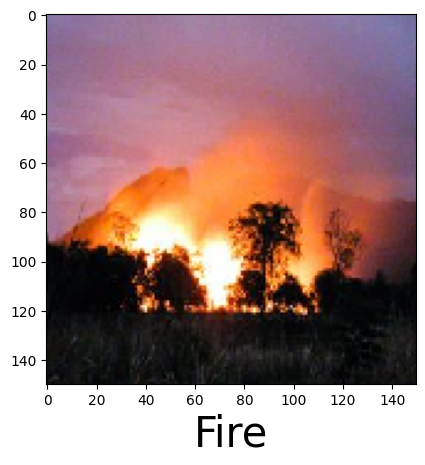

In [72]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\fire\abc183.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.]]


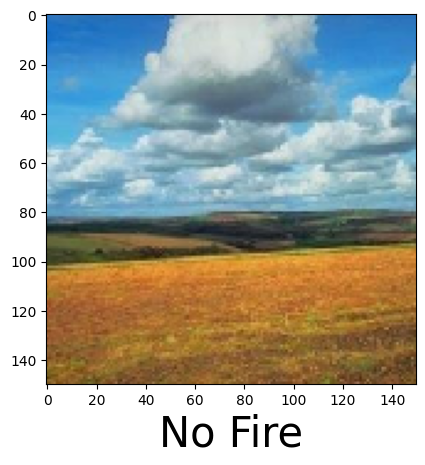

In [44]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc352.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.]]


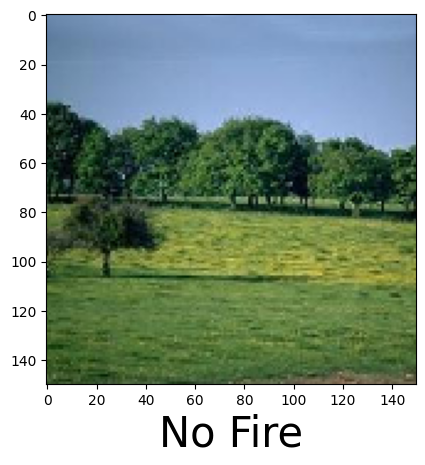

In [47]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc340.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.]]


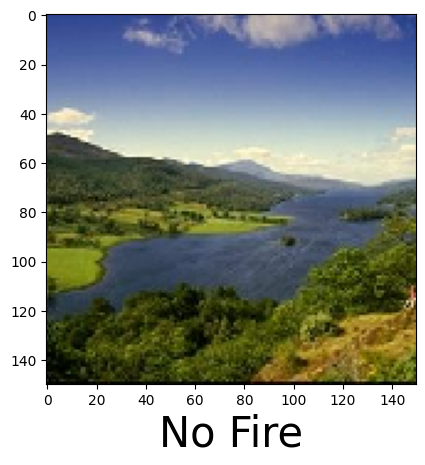

In [ ]:
predictImage(r"C:\Users\Anushka\Desktop\Forest Fire Detection\archive (1)\forest_fire\Testing\nofire\abc376.jpg")